#### **Steps to train a NN -**

1. Load the dataset as tensors
2. Create a model
3. Choose a loss function
4. Define an optimizer
5. Run a training loop, where for each sample of the dataset, we repeat -
   - Calculating Loss (Forward Pass)
   - Calculating Local Gradients
   - Updating Model Parameters

#### **Importing Libraries**

In [16]:
import torch
import torch.nn as nn
from torch.nn import MSELoss
import torch.optim as optim

In [5]:
# Sample Dataloading and model defining

# Creating Dataset and Dataloader
dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Creating Model
model = nn.Sequential(nn.Linear(4, 2),
                      nn.Linear(2, 1))

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
# Sample Training Loop

# looping through the dataset multiple times
for epoch in range(num_epochs):
    for data in dataloader:
        # setting gradients to zero
        optimizer.zero_grad()
        
        # getting feature and target from the data loader
        feature, target = data
        
        # running a forward pass (generating predictions)
        pred = model(feature)
        
        # calculating loss and gradients
        loss = criterion(pred, target)
        loss.backward()
        
        # updating parameters
        optimizer.step()


Using ReLU and LeakyReLU activation functions

In [ ]:
actv = nn.ReLU()

actv(feature)
actv.backward()
actv.grad

In [ ]:
actv = nn.LeakyReLU(negative_slope=0.03)

actv(feature)
actv.backward()
actv.grad

#### **Defining Model Architecture** (using fully connected layers, for now)

In [ ]:
model = nn.Sequential(nn.Linear(n_features, 8),
                      nn.Linear(8, 4),
                      nn.Linear(4, n_classes))

# here, 
# n_features and n_classes are number of features and number of classes in the dataset 
# and their values are to be extracted from the dataset.
# but, we can use as many hidden layers as we want. 

# Increasing hidden layers = increasing parameters = increasing model capacity.

Let's say we have the following model -
```python
nn.Sequential(nn.Linear(8, 4),
              nn.Linear(4, 2))
```

We can manually calculate the parameters of the network. 
- The first layer has 4 neurons and each neuron has 8+1 parameters = 9*4 = `36 parameters`
- The second layer has 2 neurons and each neuron has 4+1 parameters = 5*2 = `10 parameters`

. :  The model has in total, `46 learnable parameters`.

In [11]:
# Calculating number of parameters in pytorch using .numel() function 
# that returns the no. of elements in a tensor

model = nn.Sequential(nn.Linear(8, 4),
              nn.Linear(4, 2))

total = 0
for parameter in model.parameters():
    total += parameter.numel()

total

46

#### **Optimizers** - LR and Momentum

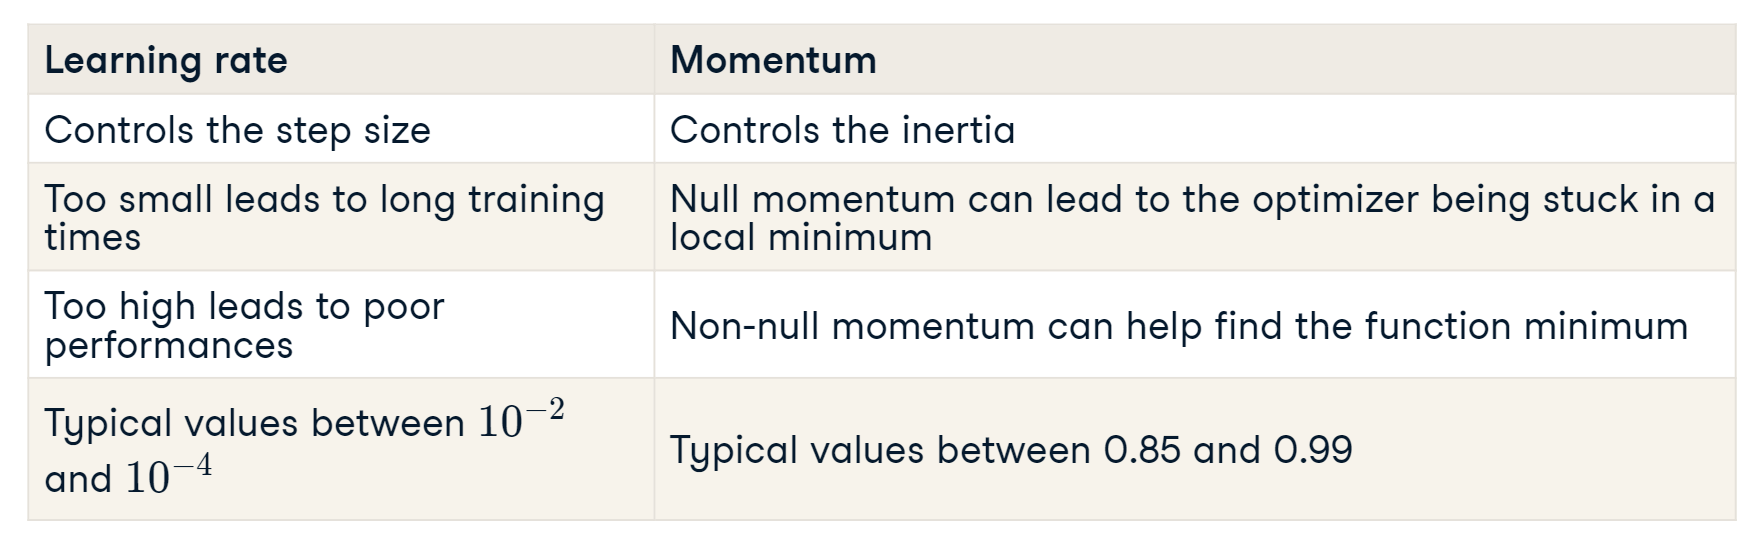

In [17]:
sgd = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.95)

#### **Layer Initialization** - random weights 

In [30]:
import torch.nn as nn

layer = nn.Linear(64, 128)
print(layer.weight.min(), layer.weight.max())

tensor(-0.1250, grad_fn=<MinBackward1>) tensor(0.1250, grad_fn=<MaxBackward1>)


default range for weight initialization is [`-0.125` to `0.125`]<br>
This is implemented because outputs can explode if inputs and weights are not normalized.

#### **Layer Initialization** - uniform weights

In [39]:
custom_layer = nn.Linear(64, 128)
nn.init.uniform_(custom_layer.weight)
print(custom_layer.weight.min(), custom_layer.weight.max())

tensor(0.0003, grad_fn=<MinBackward1>) tensor(1.0000, grad_fn=<MaxBackward1>)


⬆ Weights here are now having a linear distribution from a very small to a large value.

### **Transfer Learning**

Here, we use a pre-trained model used before for a similar task, in order to reduce the training process time and can utilize the remaining time to fine-tune the model to accelerate the training process and obtain a better model. 

In [42]:
import torch

layer = nn.Linear(64, 128)
# let's say we trained this layer and the weights are now finetuned.
# so we now save the layer weights.
torch.save(layer, 'layer.pt')

# loading a pre-trained model - layer.pt
new_layer = torch.load('layer.pt')

# .save() and .load() functions work on both, single layers and complete network models. 

#### **Fine-tuning** a model by Freezing layers

Fine-Tuning a model is when we load a previously saved model and try to improve it by tuning hyper-parameters like learning rate or freezing some layers.

We typically freeze the initial and middle layers of the model and focus on fine-tuning the layers closer to the output layer. 

We can freeze layers using the following method -

In [43]:
import torch.nn as nn

model = nn.Sequential(nn.Linear(64, 128),
                      nn.Linear(128, 256))

for name, param in model.named_parameters():
    if name == '0.weight':
        param.requires_grad = False